赛题主页:https://www.kaggle.com/competitions/GiveMeSomeCredit/overview  
本赛题是一个预测用户是否违约的二分类问题，在此过程中增加制作用户信用评分卡的部分。

# 导入所需的库

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 导入数据

In [162]:
#导入数据
train_data = pd.read_csv('cs-training.csv')
test_data=pd.read_csv('cs-test.csv')

In [163]:
print(train_data.shape)
print(test_data.shape)
print('-'*50)
print(train_data.info())
print(test_data.info())

(150000, 12)
(101503, 12)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int6

In [164]:
train_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# 查看字段标签的含义

In [165]:
# 探索字段标签含义
"""
特征                                    标签含义
SeriousDlqin2yrs                        出现 90 天或更长时间的逾期行为（即定义好坏客户）
RevolvingUtilizationOfUnsecuredLines    贷款以及信用卡可用额度与总额度比例
age                                     借款人借款年龄
NumberOfTime30-59DaysPastDueNotWorse    过去两年内出现35-59天逾期但是没有发展得更坏的次数
DebtRatio                               每月偿还债务，赡养费，生活费用除以月总收入
MonthlyIncome                           月收入
NumberOfOpenCreditLinesAndLoans         开放式贷款和信贷数量
NumberOfTimes90DaysLate                 过去两年内出现90天逾期或更坏的次数
NumberRealEstateLoansOrLines            抵押贷款和房地产贷款数量，包括房屋净值信贷额度
NumberOfTime60-89DaysPastDueNotWorse    过去两年内出现60-89天逾期但是没有发展得更坏的次数
NumberOfDependents                      家庭中不包括自身的家属人数（配偶，子女等）
""";

# 数据清洗

重复值

In [166]:
# 查看重复值 
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [167]:
# 删除重复值
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)
print(train_data.shape)
print(test_data.shape)

(150000, 12)
(101503, 12)


缺失值

In [168]:
# 对缺失值进行处理
train_data.isnull().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [169]:
test_data.isnull().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198053
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025871
dtype: float64

In [170]:
# 使用均值填充家庭成员
train_data['NumberOfDependents'].fillna(int(train_data["NumberOfDependents"].mean()),inplace=True)
test_data['NumberOfDependents'].fillna(int(test_data["NumberOfDependents"].mean()),inplace=True)

In [171]:
train_data.sample(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
64889,64890,0,0.171584,56,0,1292.000000,NaN,14,0,1,0,0.0
55768,55769,0,0.000000,58,0,0.152404,13916.0,10,0,2,0,0.0
5188,5189,0,0.497515,52,0,0.445096,5800.0,7,0,2,0,0.0
846,847,0,0.511240,58,0,0.963084,9453.0,13,0,3,0,1.0
85606,85607,0,0.545044,60,0,0.317187,13666.0,12,0,1,0,0.0


使用随机森林填补缺失值

In [172]:
def rf_fill_miss(train,to_fill): 
    """
    train:需要填充的数据
    to_fill:需要填充的列
    """
    train = train.copy()
    train = train[train[to_fill].notnull()]
    test = train[train[to_fill].isnull()]
    X = train.drop([to_fill],axis=1,inplace=False)
    y = train[to_fill]
    pred = test.drop(test[to_fill],axis=1,inplace=False)
    # 使用随机森林填充月收入
    from sklearn.ensemble import RandomForestRegressor 
    RFR = RandomForestRegressor(n_estimators=10,random_state=2022)
    RFR = RFR.fit(X,y)
    pred_miss = RFR.predict(pred)
    return pred_miss

In [173]:
# 对训练集填补
train = train_data[train_data["MonthlyIncome"].notnull()]
test = train_data[train_data["MonthlyIncome"].isnull()]
X = train.drop(["MonthlyIncome"],axis=1,inplace=False)
y = train["MonthlyIncome"]
pred = test.drop(["MonthlyIncome"],axis=1,inplace=False)
# 使用随机森林填充月收入
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(n_estimators=100,random_state=2022)
RFR = RFR.fit(X,y)
pred_miss = RFR.predict(pred)
train_data.loc[train_data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = pred_miss
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [174]:
# 对测试集填补
test_data = test_data.drop(['SeriousDlqin2yrs'],axis=1,inplace=False)

train = test_data[test_data["MonthlyIncome"].notnull()]
test = test_data[test_data["MonthlyIncome"].isnull()]
X = train.drop(["MonthlyIncome"],axis=1,inplace=False)
y = train["MonthlyIncome"]
pred = test.drop(["MonthlyIncome"],axis=1,inplace=False)
# 使用随机森林填充月收入
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(n_estimators=100,random_state=2022)
RFR = RFR.fit(X,y)
pred_miss1 = RFR.predict(pred)
test_data.loc[test_data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = pred_miss1
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    101503 non-null  float64
dtype

异常值

In [175]:
# 看是否有异常值
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,5.413461e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.314838e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,4.416000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [176]:
test_data.describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000,1.015030e+05,101503.000000,101503.000000,101503.000000,101503.000000,101503.00000
mean,50752.000000,5.310000,52.405436,0.453770,344.475020,5.558028e+03,8.453514,0.296691,1.013074,0.270317,0.74915
std,29301.536524,196.156039,14.779756,4.538487,1632.595231,3.280327e+04,5.144100,4.515859,1.110253,4.503578,1.12860
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25376.500000,0.030131,41.000000,0.000000,0.173423,1.815500e+03,5.000000,0.000000,0.000000,0.000000,0.00000
50%,50752.000000,0.152586,52.000000,0.000000,0.364260,4.416000e+03,8.000000,0.000000,1.000000,0.000000,0.00000
75%,76127.500000,0.564225,63.000000,0.000000,0.851619,7.398000e+03,11.000000,0.000000,2.000000,0.000000,1.00000
max,101503.000000,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.00000


检查数据的相关性

<AxesSubplot:>

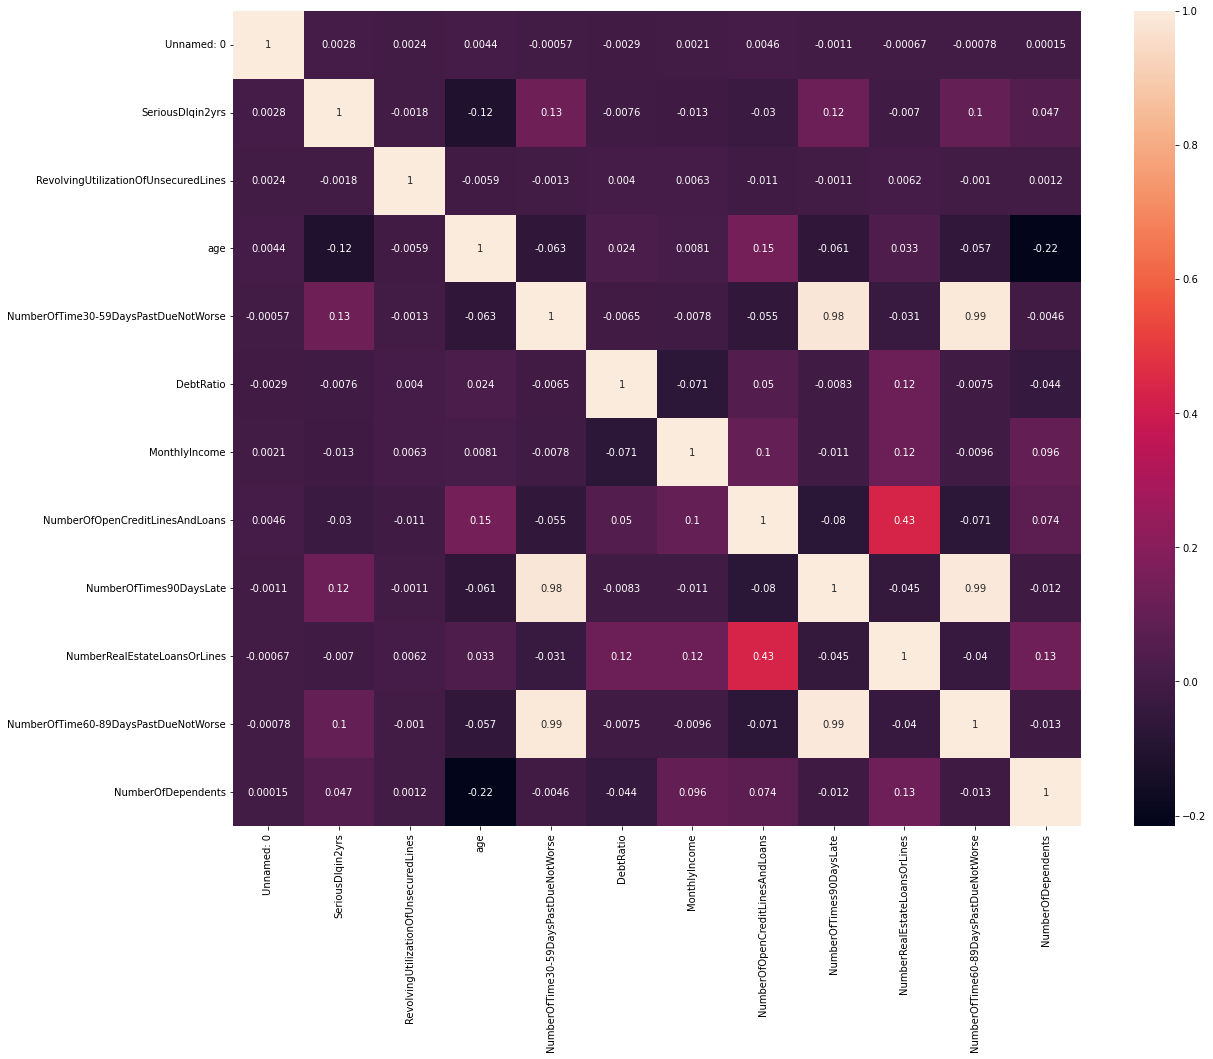

In [177]:
# 检查数据的相关性
import seaborn as sns
corr = train_data.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True, fmt='.2g')

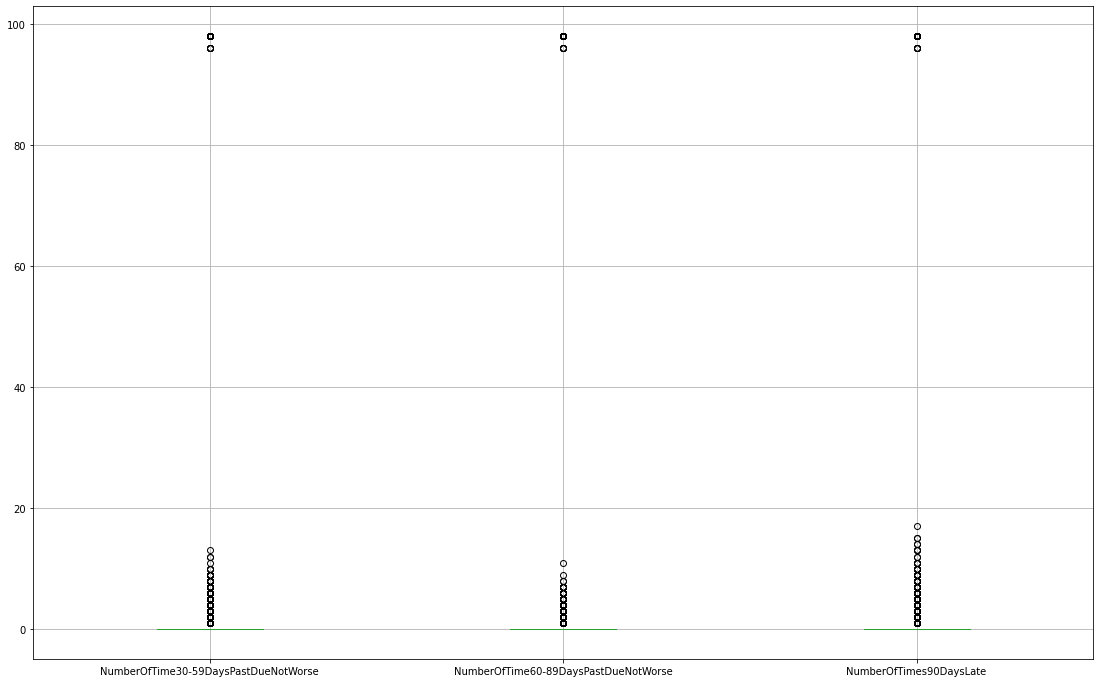

In [178]:
plt.figure(figsize=(19, 12)) 
train_data[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']].boxplot()
plt.show()

<AxesSubplot:>

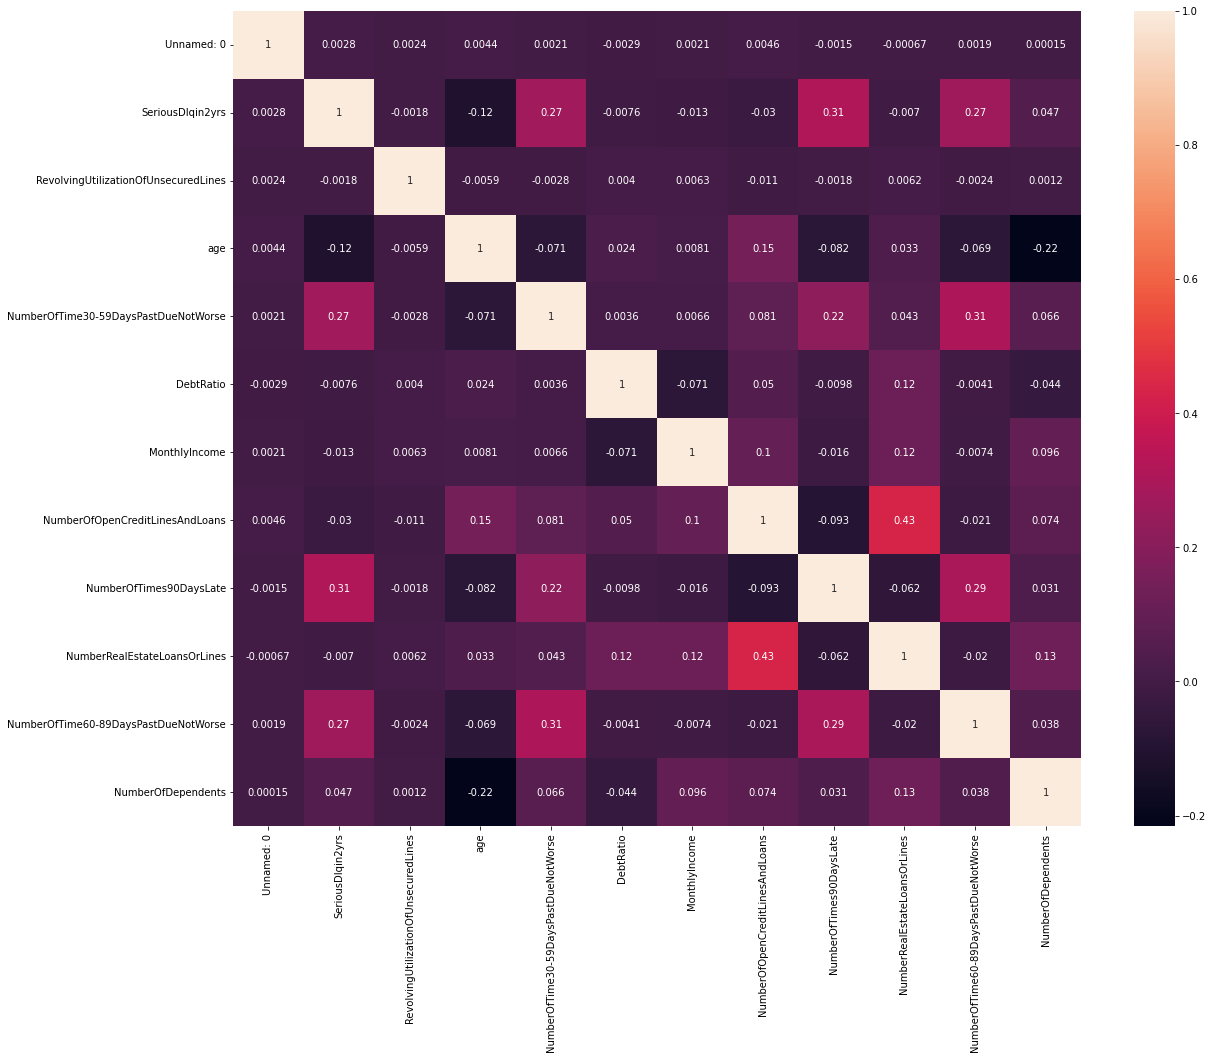

In [179]:
# 去掉98和96两个点，再查看相关性如何
def replace98and96(column):
    new = []
    newval = column.median()
    for i in column:
        if (i == 96 or i == 98):
            new.append(newval)
        else:
            new.append(i)
    return new

train_data['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(train_data['NumberOfTime30-59DaysPastDueNotWorse'])
train_data['NumberOfTimes90DaysLate'] = replace98and96(train_data['NumberOfTimes90DaysLate'])
train_data['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(train_data['NumberOfTime60-89DaysPastDueNotWorse'])

test_data['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(test_data['NumberOfTime30-59DaysPastDueNotWorse'])
test_data['NumberOfTimes90DaysLate'] = replace98and96(test_data['NumberOfTimes90DaysLate'])
test_data['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(test_data['NumberOfTime60-89DaysPastDueNotWorse'])

# 检查数据的相关性
corr = train_data.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True, fmt='.2g')

# 样本不平衡

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

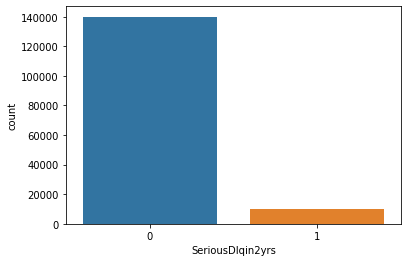

In [180]:
# 对分类结果SeriousDlqin2yrs查看
sns.countplot(x="SeriousDlqin2yrs",data=train_data)

In [181]:
# 可以看出分类结果是及其不平衡的，事件发生率如下
P = train_data.groupby('SeriousDlqin2yrs')['Unnamed: 0'].count().reset_index()
P['Percentage'] = 100 * P['Unnamed: 0'] / P['Unnamed: 0'].sum()
print(P)

   SeriousDlqin2yrs  Unnamed: 0  Percentage
0                 0      139974      93.316
1                 1       10026       6.684


In [182]:
X = train_data.iloc[:,2:]
y = train_data.loc[:,'SeriousDlqin2yrs']
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：150000; 1占6.68%; 0占93.32%


# 处理样本不平衡

In [183]:
import imblearn
 
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_resample(X,y) # 这里应该是resample
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%

样本个数：279948; 1占50.00%; 0占50.00%


# 划分训练集和测试集

In [184]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = train_data.drop('Unnamed: 0',axis=1).columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = train_data.drop('Unnamed: 0',axis=1).columns
 
model_data.to_csv(r".\model_data.csv")#训练数据
vali_data.to_csv(r".\vali_data.csv")#验证数据

# 基于卡方的分箱处理

In [185]:
import matplotlib.pyplot as plt
import scipy

In [186]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        global bins_df # 声明全局变量
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

RevolvingUtilizationOfUnsecuredLines


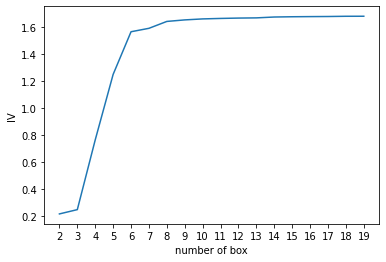

age


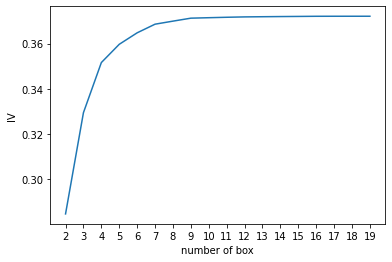

NumberOfTime30-59DaysPastDueNotWorse


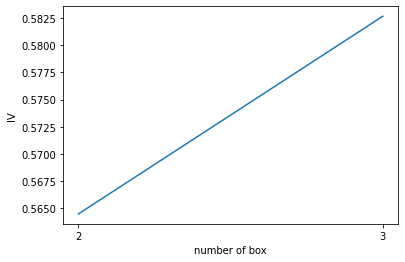

DebtRatio


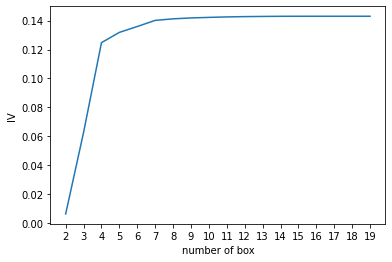

MonthlyIncome


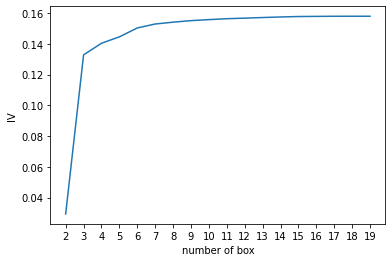

NumberOfOpenCreditLinesAndLoans


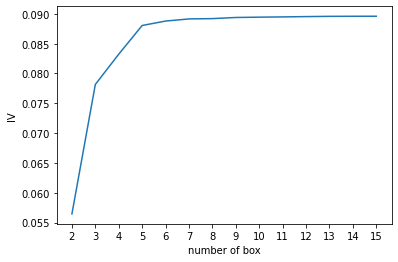

NumberOfTimes90DaysLate


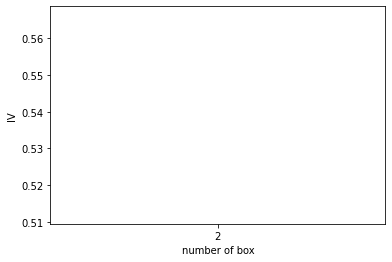

NumberRealEstateLoansOrLines


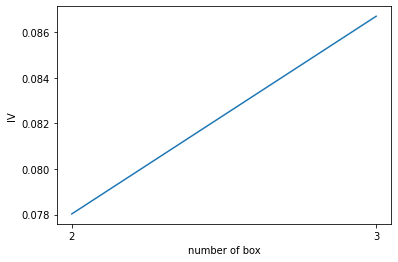

NumberOfTime60-89DaysPastDueNotWorse


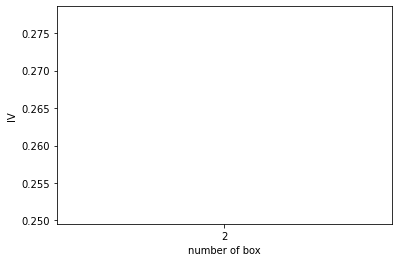

In [187]:
model_data.columns

for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [188]:
# 自动分箱的变量
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [189]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.099318683,
  0.38323699710000003,
  0.7285958869156604,
  0.9866674292308434,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.013194722,
  0.35640948865923977,
  1.4837109656087526,
  inf],
 'MonthlyIncome': [-inf, 0.11, 5550.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

# 映射数据

In [190]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0993]     2.226339
 (0.0993, 0.383]    0.501304
 (0.383, 0.729]    -0.647246
 (0.729, 0.987]    -1.349175
 (0.987, 1.0]      -0.480731
 (1.0, inf]        -2.049021
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.545090
 (36.0, 52.0]   -0.301645
 (52.0, 61.0]    0.170998
 (61.0, 74.0]    1.004079
 (74.0, inf]     1.836606
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0132]     1.324863
 (0.0132, 0.356]    0.072402
 (0.356, 1.484]    -0.342876
 (1.484, inf]       0.160055
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.11]      1.331173
 (0.11, 5550.0]   -0.237786
 (5550.0, inf]     0.234082
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.918146
 (1.0, 3.0]    -0.316269
 (3.0, 5.0]    -0.055485
 (5.0, 17.0]    0.140153
 (17.0, inf]    0.486378
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    1.067612
 (0.0, 1.0]    -1.380250
 (1.0, 2.0]    -2.025352
 (2.0, inf]    -2.251336
 dty

In [191]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head(10)

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.301645,-0.647246,-0.342876,-0.237786,0.140153,1.067612,-2.548903,0.206948,-2.971665,-0.587381,1
1,-0.301645,-0.647246,-0.342876,-0.237786,0.140153,-2.251336,-2.548903,0.638734,-2.437328,-0.587381,1
2,-0.545090,-0.480731,0.072402,-0.237786,-0.918146,1.067612,-2.548903,-0.399719,-2.437328,0.629328,1
3,-0.545090,-1.349175,0.072402,-0.237786,-0.918146,1.067612,0.686751,-0.399719,0.528765,-0.587381,1
4,-0.545090,2.226339,0.072402,0.234082,-0.055485,1.067612,0.686751,-0.399719,0.528765,-0.535777,0
5,1.004079,-1.349175,-0.342876,-0.237786,0.140153,-1.380250,0.686751,-0.399719,-2.437328,0.629328,1
6,-0.301645,-0.480731,0.072402,0.234082,0.140153,1.067612,0.686751,-0.399719,0.528765,0.629328,0
7,-0.301645,-0.480731,0.160055,-0.237786,-0.055485,-1.380250,-2.548903,-0.399719,0.528765,-0.488751,1
8,-0.545090,-1.349175,0.072402,-0.237786,-0.055485,1.067612,0.686751,-0.399719,0.528765,-0.488751,0
9,-0.545090,-0.480731,0.072402,-0.237786,-0.918146,1.067612,0.686751,-0.399719,0.528765,0.629328,0


# 逻辑回归模型验证

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [194]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

0.8595701613383342

In [195]:
from cProfile import label
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score
y_pred_cm = lr.predict(vali_X)
print(confusion_matrix(vali_y,y_pred_cm))
print(roc_auc_score(vali_y,y_pred_cm))
print(recall_score(vali_y,y_pred_cm))

[[37195  4704]
 [ 7090 34996]]
0.8596327224404561
0.8315354274580621


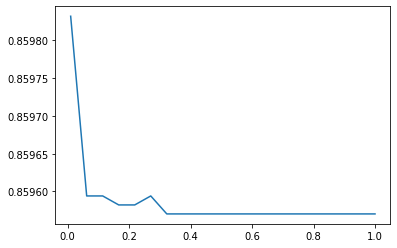

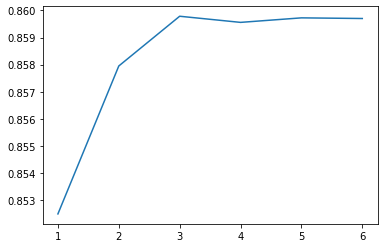

In [196]:
# 稍微调下参数
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

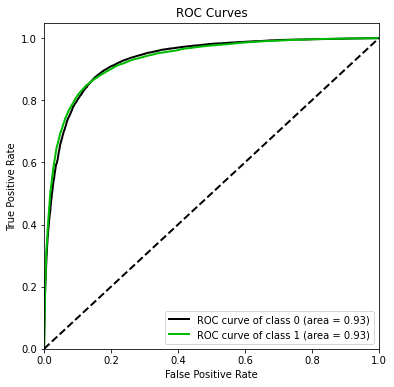

In [197]:
import scikitplot as skplt

vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

# 制作评分卡

In [198]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A

(28.85390081777927, 481.8621880878296)

In [199]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 36.0]    -8.771646
(36.0, 52.0]    -4.854108
(52.0, 61.0]     2.751717
(61.0, 74.0]    16.157756
(74.0, inf]     29.554874
dtype: float64

In [200]:
file = "./ScoreData.csv"
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

评分卡

In [201]:
# 查看评分卡
import pandas as pd
ScoreData = pd.read_csv("ScoreData.csv")
ScoreData

,base_score,[480.63106625]
0,age,Score
1,"(-inf, 36.0]",-4.552283660259392
2,"(36.0, 52.0]",-2.5191709082604223
3,"(52.0, 61.0]",1.4280781088846914
4,"(61.0, 74.0]",8.385505773675835
5,"(74.0, inf]",15.338303867597974
6,RevolvingUtilizationOfUnsecuredLines,Score
7,"(-inf, 0.0993]",35.826506788480415
8,"(0.0993, 0.383]",8.067036753793456
9,"(0.383, 0.729]",-10.415554379198333


计算用户的score

In [202]:
# 使用证据权重矩阵计算用户的score
log_odds=model_woe.drop('SeriousDlqin2yrs',axis=1,inplace=False)
# 使用公式score = A-B*log_odds 其中A=482，B=29
score = pd.DataFrame()
for i in log_odds.columns:
    score[i] = pd.Series(log_odds[i]).astype(float)*29
score['Row_sum'] = score.apply(lambda x: x.sum(), axis=1) # 按行求和，添加为新列
score['scorecredit'] = 482-score['Row_sum']

In [203]:
print(score['scorecredit'].describe().T)
print('-'*100)
print(score['scorecredit'].sort_values(ascending=False))
print('到这一步，评分卡就算制作完成了，可以看到最高分数是852，最低分数为203')

count    195963.000000
mean        493.616926
std         143.395270
min         203.839481
25%         372.794683
50%         470.301749
75%         606.867727
max         852.977477
Name: scorecredit, dtype: float64
----------------------------------------------------------------------------------------------------
53832     852.977477
113386    840.968362
62654     839.386890
92207     839.386890
1422      837.645977
             ...    
14158     213.880009
191520    213.880009
156379    213.880009
55312     213.880009
135624    203.839481
Name: scorecredit, Length: 195963, dtype: float64
到这一步，评分卡就算制作完成了，可以看到最高分数是852，最低分数为203


可见大部分用户落在300-500分的区间，
少量用户低于300分，为高风险用户
600分以上的用户为高质量用户


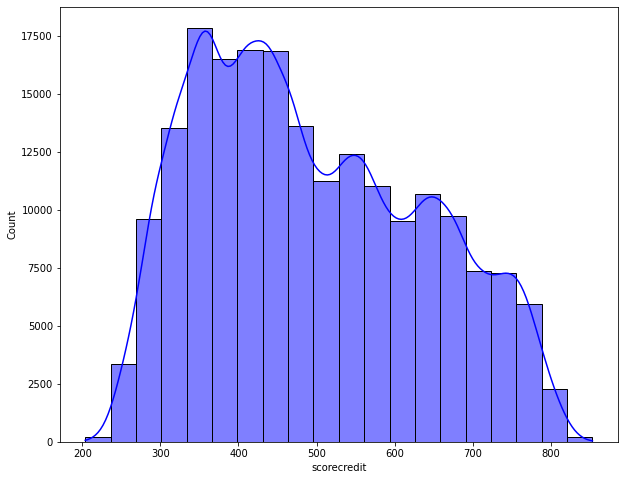

In [204]:
# 查看用户的score的分布情况
print('可见大部分用户落在300-500分的区间，\n少量用户低于300分，为高风险用户\n600分以上的用户为高质量用户')
fig=plt.figure(figsize=(10,8))
sns.histplot(x=score['scorecredit'],data=score,bins=20,kde=True,color='b');

# 违约预测

In [205]:
train_data = train_data.drop('Unnamed: 0',axis=1)
test_data = test_data.drop('Unnamed: 0',axis=1)

In [206]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

In [207]:
# 切分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [208]:
X.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.0,0.002969,0.029867,0.154181,0.559046,0.981278,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.245353,0.697231,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,13.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.0,0.030874,0.175074,0.366508,0.868254,1267.000000,4979.040000,329664.0
MonthlyIncome,150000.0,5413.460779,13148.382157,0.0,0.0,0.180000,1800.000000,4416.000000,7400.000000,10758.200000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.090293,0.485107,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.064707,0.329788,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.0
NumberOfDependents,150000.0,0.737413,1.107021,0.0,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,20.0


建立一级模型

In [209]:
from sklearn.model_selection import cross_val_score,KFold,cross_validate
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [267]:
# 构建一级模型基础，在此基础上进行选择和调整
#model={}
#model['rfc']=RandomForestClassifier()
#model['gdbt']=GradientBoostingClassifier()
#model['hgb']=HistGradientBoostingClassifier()
#model['xgb']=XGBClassifier()
#model['lgb']=LGBMClassifier()
#model['cgb']=CatBoostClassifier(verbose=False)
#
#for i in model:
#    model[i].fit(X_train,y_train)
#    cv = KFold(n_splits=5,shuffle=True,random_state=2022)
#    score=cross_validate(model[i],X_test,
#                        y_test,
#                        cv=cv,
#                        scoring='roc_auc',
#                        n_jobs=-1,
#                        return_train_score=True
#                        )
#    #print(f'{i}的train_score为：{round(score["train_score"].mean(),4)}')
#    print(f'{i}的test_score为：{round(score["test_score"].mean(),4)}')

"""
rfc的test_score为：0.9331
gdbt的test_score为：0.9346
hgb的test_score为：0.9346
xgb的test_score为：0.9321
lgb的test_score为：0.9344
cgb的test_score为：0.9336
"""

'\nrfc的test_score为：0.9331\ngdbt的test_score为：0.9346\nhgb的test_score为：0.9346\nxgb的test_score为：0.9321\nlgb的test_score为：0.9344\ncgb的test_score为：0.9336\n'

模型优化

In [252]:
# 随便调调LGB的参数
from sklearn.model_selection import KFold,cross_validate
lgb1 = LGBMClassifier(boosting_type='dart',
                    learning_rate=0.01,
                    n_estimators=200,
                    max_depth=12,
                    reg_lambda=0
                    #num_leaves=31
                    )
lgb = lgb1.fit(X_train,y_train)
cv = KFold(n_splits=5,shuffle=True,random_state=2022)
lgb_cv = cross_validate(lgb1,X_test,y_test,cv=cv,scoring='roc_auc',n_jobs=-1,return_train_score=True)
#print(f'{i}的train_score为：{round(score["train_score"].mean(),4)}')
print(f'roc_auc为：{round(score["test_score"].mean(),4)}')

roc_auc为：0.9336


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

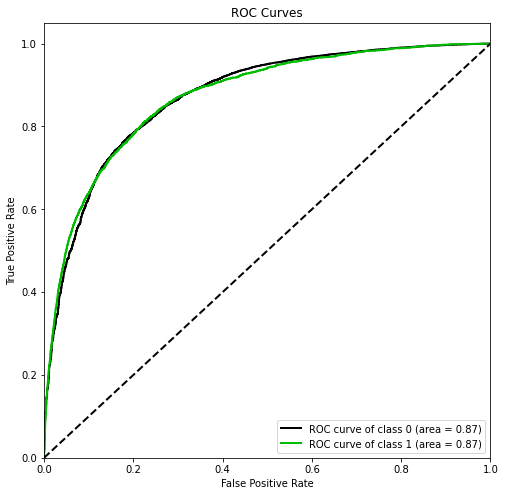

In [241]:
# 绘制ROC曲线
import scikitplot as skplt
test_pred = lgb1.predict_proba(X_test)
test_pred=pd.DataFrame(test_pred,index =y_test.index)
skplt.metrics.plot_roc(y_test, test_pred,
                        plot_micro=False,figsize=(8,8),
                        plot_macro=False)

随机网格搜索

In [ ]:
# 随机网格搜索lgb超参数
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

#参数空间 
r_param_grid = {"boosting_type": ["gbdt","dart","goss"]
                ,'n_estimators': [*range(50,200,50)]
                ,'max_depth': [*range(5,20,5)]
                ,'learning_rate': [0.01,0.05,0.1]
                ,'reg_lambda':[0.1,0.5,1,2]
                }

#建立分类器、交叉验证
lgb2 = LGBMClassifier(random_state=2022,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=2022)
lgb_rcv = RandomizedSearchCV(estimator=lgb2
                            ,param_distributions=r_param_grid
                            ,n_iter = 500 #子空间的大小是全域空间的一半左右
                            ,scoring = "roc_auc"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=1412
                            ,n_jobs=-1
                            )
lgb_rcv=lgb_rcv.fit(X_train,y_train)
print('best parameters:',lgb_rcv.best_estimator_)
print('best score:',lgb_rcv.best_score_)       
print('train score:',lgb_rcv.score(X_train,y_train))         
print('test score:',lgb_rcv.score(X_test,y_test))  

贝叶斯优化

In [ ]:
#导入优化算法
import hyperopt
from lightgbm import LGBMClassifier
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss

def hyperopt_objective(params):
    paramsforlgb = {"learning_rate":params["learning_rate"]
                    ,"boosting_type":params["boosting_type"]
                    ,"colsample_bytree":params["colsample_bytree"]
                    ,"colsample_bynode":params["colsample_bynode"]
                    #,"reg_gamma":params["reg_gamma"]
                    ,"reg_lambda":params["reg_lambda"]
                    ,"min_child_weight":params["min_child_weight"]
                    ,"max_depth":int(params["max_depth"])
                    ,"subsample":params["subsample"]
                    ,"objective":params["objective"]
                    ,"rate_drop":params["rate_drop"]
                    ,"nthread":14
                    ,"verbosity":0
                    ,"seed":1412}

    Lgb = LGBMClassifier(
                        learning_rate=int(params["learning_rate"])
                        ,boosting_type=int(params["boosting_type"])
                        ,colsample_bytree=int(params["colsample_bytree"])
                        ,colsample_bynode=int(params["colsample_bynode"])
                        #,gamma":params["gamma"]
                        ,reg_lambda=int(params["reg_lambda"])
                        ,min_child_weight=int(params["min_child_weight"])
                        ,max_depth=int(params["max_depth"])
                        ,subsample=int(params["subsample"])
                        ,objective=int(params["objective"])
                        ,rate_drop=int(params["rate_drop"])
                        )
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(Lgb,X,y
                                     ,scoring="roc_auc"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                     )
    #最终输出AUC
    return np.mean(abs(validation_loss["test_score"]))

param_grid_simple = {'n_estimators': hp.quniform("n_estimators",50,200,10)
                     ,"learning_rate": hp.quniform("learning_rate",0.05,2.05,0.05)
                    # ,"boosting_type":hp.choice("boosting_type",["gbdt","dart"])
                     ,"colsample_bytree":hp.quniform("colsample_bytree",0.3,1,0.1)
                     ,"colsample_bynode":hp.quniform("colsample_bynode",0.1,1,0.1)
                    # ,"gamma":hp.quniform("gamma",1e6,1e7,1e6)
                     ,"reg_lambda":hp.quniform("lambda",0,3,0.2)
                     ,"min_child_weight":hp.quniform("min_child_weight",0,50,2)
                     ,"max_depth":hp.choice("max_depth",[*range(2,30,2)])
                     ,"subsample":hp.quniform("subsample",0.1,1,0.1)
                     ,"objective":hp.choice("objective",["binary:logistic","binary:hinge"])
                     ,"rate_drop":hp.quniform("rate_drop",0.1,1,0.1)
                    }

def param_hyperopt(max_evals=100):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(30)
    
    #定义代理模型
    params_best = fmin(hyperopt_objective
                       , space = param_grid_simple
                       , algo = tpe.suggest
                       , max_evals = max_evals
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials

params_best, trials = param_hyperopt(100) #由于参数空间巨大，给与100次迭代的空间

In [266]:
# 尝试使用optuna优化lgb
import optuna
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def optuna_objective(trial):
    
    #定义参数空间
    n_estimators = trial.suggest_int("n_estimators",10,50,10) #整数型，(参数名称，下界，上界，步长)
    #learning_rate = trial.suggest_discrete_uniform("learning_rate",0.001,0.01,0.02)
    #max_depth = trial.suggest_int("max_depth",1,15,1)
    #num_leaves = trial.suggest_int("max_leaves",10,100,10)
    #max_bin = trial.suggest_int("max_bin",20,250,10)
    
    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    lgb4 = LGBMClassifier(n_estimators = n_estimators,
                        #learning_rate=learning_rate,
                        max_depth = 11,
                        #num_leaves=num_leaves,
                        random_state=2022,
                        verbose=0,
                        n_jobs=-1
                        )
    
    #交叉验证过程，输出AUC
    #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
    #如果选择输出RMSE，则选择最小化
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(lgb4,X,y
                                     ,scoring="roc_auc"
                                     ,cv=cv #交叉验证模式
                                     ,verbose=False #是否打印进程
                                     ,n_jobs=-1 #线程数
                                     ,error_score='raise'
                                    )
    #最终输出RMSE
    return np.mean(abs(validation_loss["test_score"]))
    
#优化函数
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="minimize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params,best_score = optimizer_optuna(100,"TPE")

  0%|          | 0/100 [00:00<?, ?it/s]


 
 best params:  {'n_estimators': 10} 
 
 best score:  [0.8593722129394722] 



绘制ROC曲线

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 720x720 with 0 Axes>

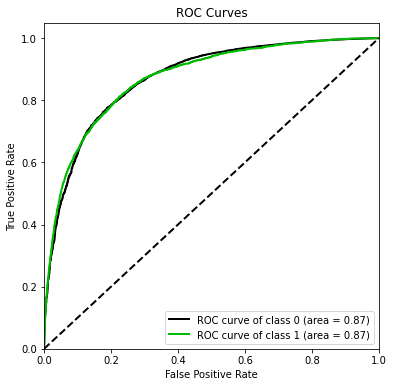

In [240]:
# 绘制ROC曲线
import scikitplot as skplt
vali_df = pd.DataFrame(lgb.predict_proba(X_test))
fig = plt.figure(figsize=(10,10))
skplt.metrics.plot_roc(y_test, vali_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

结果提交

In [ ]:
# 保存结果
pre_y=lgb.predict(test_data)
result=pd.read_csv('sampleEntry.csv')
result['Probability']=pre_y
result.to_csv('lgb.csv',index=False)

In [ ]:
# 保存结果
hgb = HistGradientBoostingClassifier().fit(X,y)
pre_y=hgb.predict(test_data)
result=pd.read_csv('sampleEntry.csv')
result['Probability']=pre_y
result.to_csv('hgb.csv',index=False)